In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('../../../build/src/experiments/data.csv', sep=",")
df

,INDEX:1000:<ulong>,origin_z:1000:<float>,intersect_x:1000:<float>,intersect_y:1000:<float>,idx_x:1000:<float>,idx_y:1000:<float>,value:1000:<float>,time:1000:<float>,gt_intersect_x:1000:<float>,gt_intersect_y:1000:<float>
0,0,-50.000000,153,-50,153,0,2.810986,0,100.000000,-50.000000
1,1,-49.900002,153,-50,153,0,2.810986,0,99.842934,-49.999752
2,2,-49.799999,153,-50,153,0,2.810986,0,99.685837,-49.999012
3,3,-49.700001,153,-50,153,0,2.810986,0,99.528770,-49.997780
4,4,-49.599998,153,-50,153,0,2.810986,0,99.371689,-49.996052
...,...,...,...,...,...,...,...,...,...,...
995,995,49.500000,91,49,91,0,-0.180325,91,99.214622,49.993832
996,996,49.599998,91,49,91,0,-0.180325,91,99.371689,49.996052
997,997,49.700005,91,49,91,0,-0.180325,91,99.528763,49.997780
998,998,49.800003,91,49,91,0,-0.180325,91,99.685829,49.999012


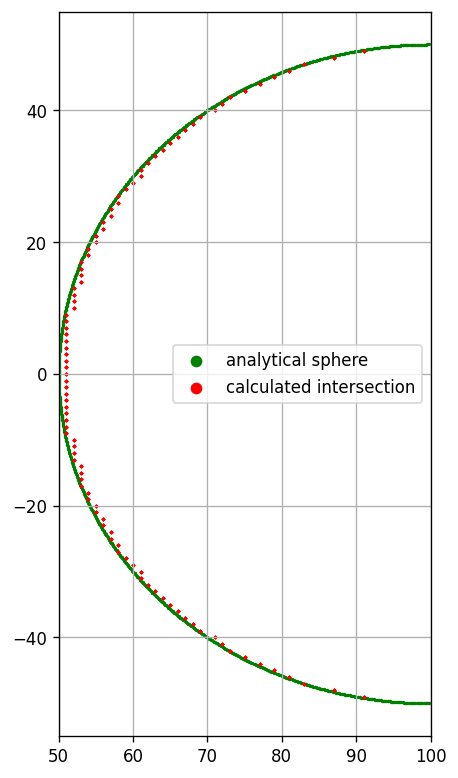

In [74]:
plt.figure(figsize=(4,8), dpi=120)
plt.scatter(x=df["gt_intersect_x:1000:<float>"], y=df["gt_intersect_y:1000:<float>"], s=1, c='green', label="analytical sphere")
plt.scatter(x=df["intersect_x:1000:<float>"], y=df["intersect_y:1000:<float>"], s=1, c='red', label="calculated intersection")
plt.grid()
plt.xlim(50,100)
plt.legend(markerscale=6)

(-1.0, 1.0)

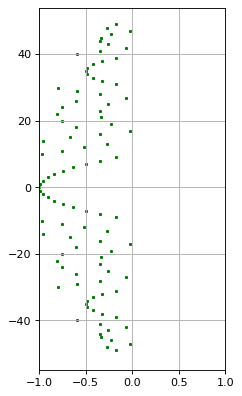

In [34]:
plt.figure(figsize=(3,6), dpi=80)
plt.scatter(x=df["value:1000:<float>"], y=df["intersect_y:1000:<float>"], s=1, c='green')
plt.grid()
plt.xlim(-1,1)
plt.xlabel("Value")
plt.ylabel("")

(50.0, 100.0)

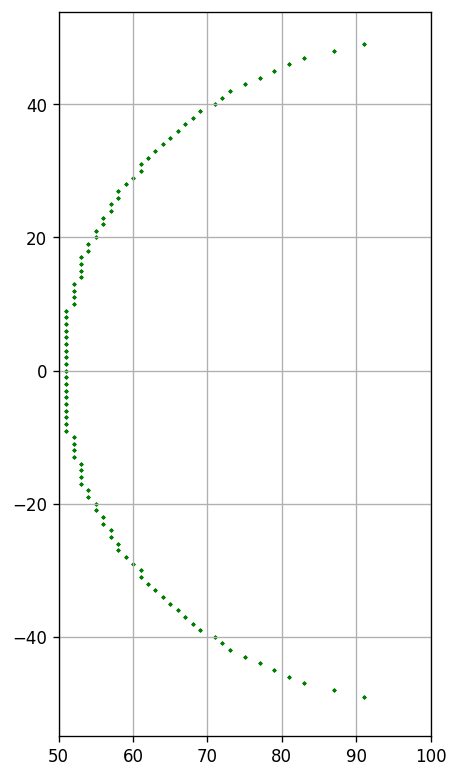

In [70]:
plt.figure(figsize=(4,8), dpi=120)
plt.scatter(x=df["time:1000:<float>"], y=df["intersect_y:1000:<float>"], s=1, c='green')
plt.grid()
plt.xlim(50,100)